In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('data/final_processed.csv')
df

,QUESTID2,AUPOPAMT,AUUNCOST,AUUNNCOV,AUUNENUF,AGE2,IRSEX,INCOME,IRMARIT,SERVICE,...,JBSTATR2,TXEVER,TXYREVER,AUN_SUM,AUUN_ANY,HEALTH,K6SCMON,PRVHLTIN,GRPHLTIN,YEAR
0,2013_53815143,NaN,NaN,NaN,NaN,15,2,4,4,2.0,...,1.0,0.0,99.0,0.0,0,3.0,9.0,1.0,1.0,2013
1,2013_47035143,NaN,NaN,NaN,NaN,2,1,4,99,99.0,...,99.0,1.0,1.0,0.0,0,5.0,NaN,2.0,2.0,2013
2,2013_55565143,NaN,NaN,NaN,NaN,11,1,1,4,1.0,...,7.0,0.0,99.0,0.0,0,5.0,0.0,2.0,2.0,2013
3,2013_83765143,NaN,NaN,NaN,NaN,13,2,2,4,2.0,...,1.0,0.0,99.0,0.0,0,5.0,4.0,1.0,1.0,2013
4,2013_91965143,NaN,NaN,NaN,NaN,15,2,1,1,2.0,...,9.0,0.0,99.0,0.0,0,3.0,0.0,2.0,2.0,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873398,2009_67814730,NaN,NaN,NaN,NaN,5,2,2,4,99.0,...,7.0,1.0,1.0,0.0,0,5.0,NaN,2.0,2.0,2009
873399,2009_35824730,NaN,NaN,NaN,NaN,10,2,2,1,2.0,...,9.0,0.0,99.0,0.0,0,5.0,0.0,2.0,2.0,2009
873400,2009_73024730,NaN,NaN,NaN,NaN,15,2,4,1,2.0,...,1.0,0.0,99.0,0.0,0,4.0,0.0,1.0,1.0,2009
873401,2009_65344730,NaN,NaN,NaN,NaN,9,1,4,4,2.0,...,2.0,1.0,1.0,0.0,0,4.0,1.0,2.0,2.0,2009


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873403 entries, 0 to 873402
Data columns (total 27 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   QUESTID2  873403 non-null  object 
 1   AUPOPAMT  17936 non-null   float64
 2   AUUNCOST  44912 non-null   float64
 3   AUUNNCOV  44912 non-null   float64
 4   AUUNENUF  44912 non-null   float64
 5   AGE2      873403 non-null  int64  
 6   IRSEX     873403 non-null  int64  
 7   INCOME    873403 non-null  int64  
 8   IRMARIT   873403 non-null  int64  
 9   SERVICE   873174 non-null  float64
 10  CG30EST   872798 non-null  float64
 11  AL30EST   859287 non-null  float64
 12  IRHHSIZ2  873403 non-null  int64  
 13  NOBOOKY2  861855 non-null  float64
 14  COCFLAG   873403 non-null  int64  
 15  COCYR     873403 non-null  int64  
 16  EDUCCAT2  873403 non-null  float64
 17  JBSTATR2  869148 non-null  float64
 18  TXEVER    863557 non-null  float64
 19  TXYREVER  863507 non-null  float64
 20  AUN_

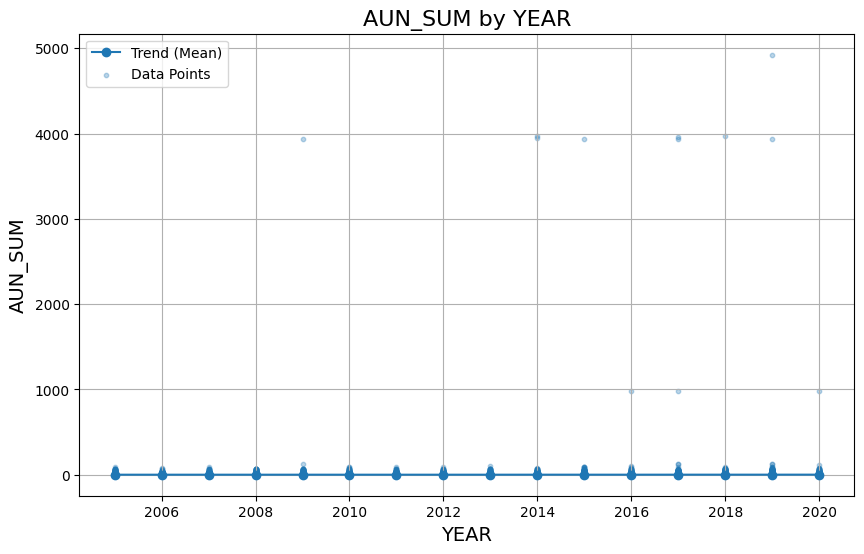

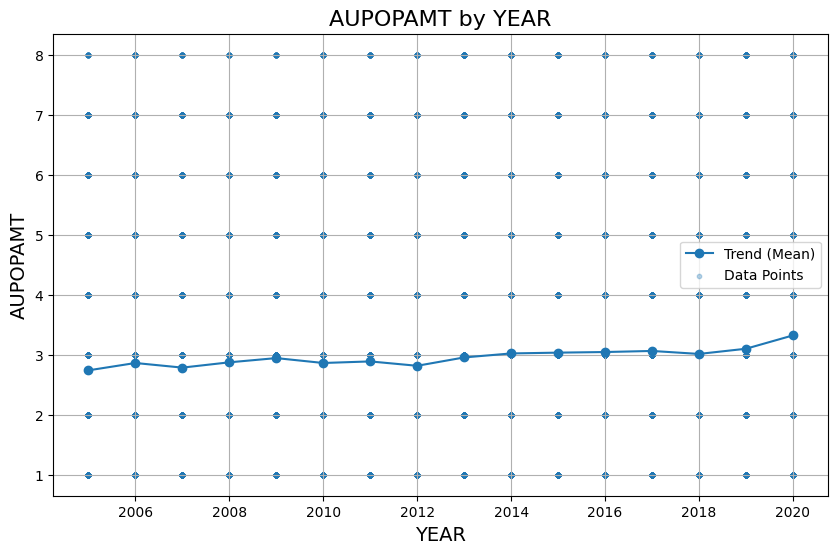

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


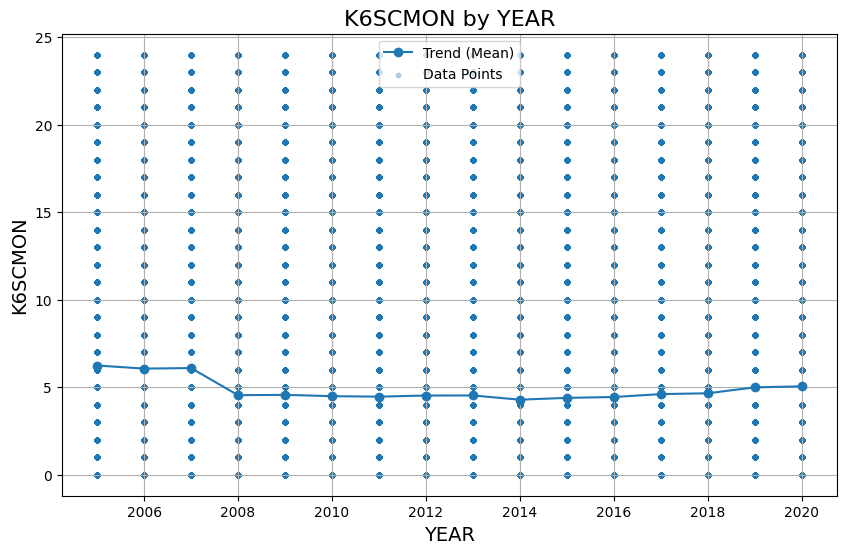

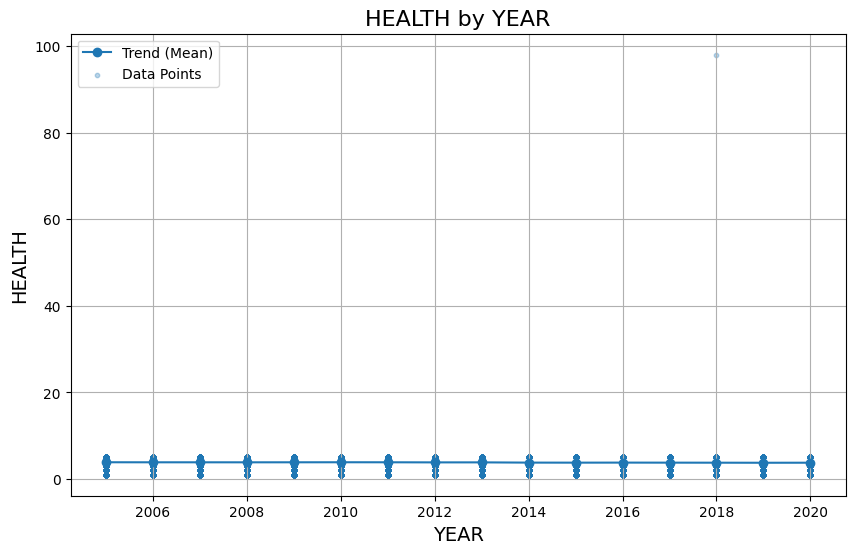

In [18]:
import pandas as pd
import matplotlib.pyplot as plt


# x축 및 변수 이름
x_col = 'YEAR'
y_cols = ['AUN_SUM', 'AUPOPAMT', 'K6SCMON', 'HEALTH']

# 그래프 그리기
for y_col in y_cols:
    plt.figure(figsize=(10, 6))
    
    # NaN 제거
    valid_data = df[[x_col, y_col]].dropna()
    
    # 그룹별 평균 계산
    mean_data = valid_data.groupby(x_col).mean()
    
    # 선 그래프 그리기 (추세선)
    plt.plot(mean_data.index, mean_data[y_col], marker='o', label='Trend (Mean)')
    
    # 산점도 (간단히 추세 보조용)
    plt.scatter(valid_data[x_col], valid_data[y_col], alpha=0.3, label='Data Points', s=10)
    
    plt.title(f'{y_col} by {x_col}', fontsize=16)
    plt.xlabel(x_col, fontsize=14)
    plt.ylabel(y_col, fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.show()

In [16]:
df['HEALTH'].value_counts()

HEALTH
4.0     343688
5.0     234462
3.0     220355
2.0      63581
1.0      11139
98.0         1
Name: count, dtype: int64

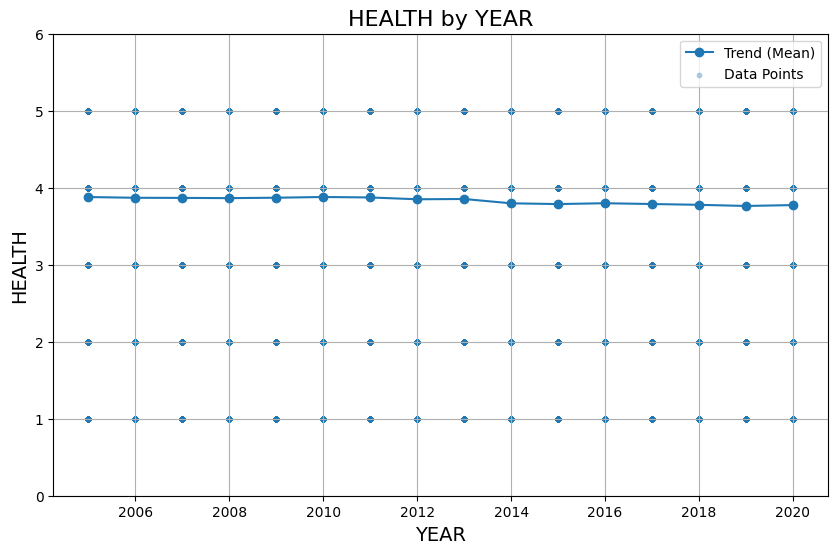

In [19]:
# NaN 제거
valid_data = df[['YEAR', 'HEALTH']].dropna()

# 그룹별 평균 계산
mean_data = valid_data.groupby('YEAR').mean()

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 선 그래프 (추세선)
plt.plot(mean_data.index, mean_data['HEALTH'], marker='o', label='Trend (Mean)')

# 산점도
plt.scatter(valid_data['YEAR'], valid_data['HEALTH'], alpha=0.3, label='Data Points', s=10)

# y축 제한
plt.ylim(0, 6)

# 그래프 설정
plt.title('HEALTH by YEAR', fontsize=16)
plt.xlabel('YEAR', fontsize=14)
plt.ylabel('HEALTH', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()